In [1]:
#import seaborn as sns
#import pandas as pd
#import numpy as np
#from scipy import stats

import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dataManipulation').getOrCreate()

In [2]:
#mat = pd.read_csv('student-mat.csv', sep = ';')
#print(mat.head(10))
#print(mat.shape)


matdf = spark.read.csv('student-mat.csv',sep = ';', header=True,inferSchema=True)

#Here's the first row of the data.
print(matdf.head())

#And the entire data structure. 
matdf.printSchema()

matdf.show()

#Data description
matdf.describe().toPandas().transpose()

Row(school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=6, G1=5, G2=6, G3=6)
root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup: s

,0,1,2,3,4
summary,count,mean,stddev,min,max
school,395,None,None,GP,MS
sex,395,None,None,F,M
age,395,16.696202531645568,1.2760427246056265,15,22
address,395,None,None,R,U
famsize,395,None,None,GT3,LE3
Pstatus,395,None,None,A,T
Medu,395,2.749367088607595,1.0947351414285371,0,4
Fedu,395,2.5215189873417723,1.0882005458269433,0,4
Mjob,395,None,None,at_home,teacher


In [3]:
#port = pd.read_csv('student-por.csv', sep = ';')
#print(port.head(10))
#print(port.shape)
portdf = spark.read.csv('student-por.csv',sep = ';', header=True,inferSchema=True)

#Here's the first row of the data.
print(portdf.head())

#And the entire data structure. 
portdf.printSchema()

portdf.show()

#Data description
portdf.describe().toPandas().transpose()

Row(school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=4, G1=0, G2=11, G3=11)
root
 |-- school: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- famsize: string (nullable = true)
 |-- Pstatus: string (nullable = true)
 |-- Medu: integer (nullable = true)
 |-- Fedu: integer (nullable = true)
 |-- Mjob: string (nullable = true)
 |-- Fjob: string (nullable = true)
 |-- reason: string (nullable = true)
 |-- guardian: string (nullable = true)
 |-- traveltime: integer (nullable = true)
 |-- studytime: integer (nullable = true)
 |-- failures: integer (nullable = true)
 |-- schoolsup:

,0,1,2,3,4
summary,count,mean,stddev,min,max
school,649,None,None,GP,MS
sex,649,None,None,F,M
age,649,16.7442218798151,1.2181376394800634,15,22
address,649,None,None,R,U
famsize,649,None,None,GT3,LE3
Pstatus,649,None,None,A,T
Medu,649,2.514637904468413,1.1345519999533167,0,4
Fedu,649,2.3066255778120186,1.0999309111408038,0,4
Mjob,649,None,None,at_home,teacher


In [4]:
#merged = mat.append(port)
#print(merged.shape)
mergedspark = matdf.union(portdf)

print(mergedspark.head(5))
mergedspark.describe()
print("Total rows:", mergedspark.count())
mergedspark.printSchema()

[Row(school='GP', sex='F', age=18, address='U', famsize='GT3', Pstatus='A', Medu=4, Fedu=4, Mjob='at_home', Fjob='teacher', reason='course', guardian='mother', traveltime=2, studytime=2, failures=0, schoolsup='yes', famsup='no', paid='no', activities='no', nursery='yes', higher='yes', internet='no', romantic='no', famrel=4, freetime=3, goout=4, Dalc=1, Walc=1, health=3, absences=6, G1=5, G2=6, G3=6), Row(school='GP', sex='F', age=17, address='U', famsize='GT3', Pstatus='T', Medu=1, Fedu=1, Mjob='at_home', Fjob='other', reason='course', guardian='father', traveltime=1, studytime=2, failures=0, schoolsup='no', famsup='yes', paid='no', activities='no', nursery='no', higher='yes', internet='yes', romantic='no', famrel=5, freetime=3, goout=3, Dalc=1, Walc=1, health=3, absences=4, G1=5, G2=5, G3=6), Row(school='GP', sex='F', age=15, address='U', famsize='LE3', Pstatus='T', Medu=1, Fedu=1, Mjob='at_home', Fjob='other', reason='other', guardian='mother', traveltime=1, studytime=2, failures=3, 

In [5]:

#merged['Result'] = np.where(merged['G3'] >= 10, 'Pass', 'Fail')
#print(merged.head(10))


#mergedspark['Result'] = mergedspark.filter(mergedspark['G3'] >= 10, 'Pass', 'Fail')
#mergedspark['Result']= (mergedspark.filter(mergedspark.G3 > 10),'Pass', 'Fail')
#mergedspark.filter(mergedspark.G3 > 10).collect()
from pyspark.sql.functions import udf

def passorfail(G3):
    if G3 >= 10:
        return 'Pass'
    else:
        return 'Fail'

check = udf(passorfail)
mergedspark_new = mergedspark.withColumn("Results",check("G3"))
mergedspark_new.show(n=10)

+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+-------+
|school|sex|age|address|famsize|Pstatus|Medu|Fedu|    Mjob|    Fjob|    reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences| G1| G2| G3|Results|
+------+---+---+-------+-------+-------+----+----+--------+--------+----------+--------+----------+---------+--------+---------+------+----+----------+-------+------+--------+--------+------+--------+-----+----+----+------+--------+---+---+---+-------+
|    GP|  F| 18|      U|    GT3|      A|   4|   4| at_home| teacher|    course|  mother|         2|        2|       0|      yes|    no|  no|        no|    yes|   yes|      no|      no|     4|       3|    4|   1|   1|     3|       6|  5|  6| 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Results       0
dtype: int64
1044
1039
1039
1024
1024
1023
1023
1003


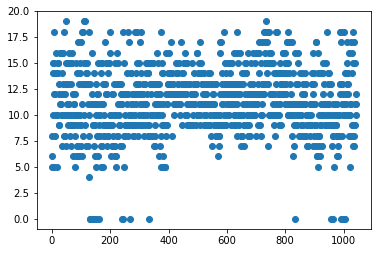

In [56]:
mergedpd = mergedspark_new.toPandas() 

import matplotlib.pyplot as plt
y = mergedpd['G2']
x = range(0,len(mergedpd))
plt.scatter(x,y)
mergedpd[mergedpd['G2']== 0]

#Check for missing values
print(mergedpd.isnull().sum())

#Check for outliers within age. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
import numpy as np
from scipy import stats
mergedpd['age z score'] = np.abs(stats.zscore(mergedpd['age']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['age z score'] < 3]
print(len(mergedpd))

#Check for outliers within absences. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
mergedpd['absences z score'] = np.abs(stats.zscore(mergedpd['absences']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['absences z score'] < 3]
print(len(mergedpd))


#Check for outliers within G1. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
mergedpd['G1 z score'] = np.abs(stats.zscore(mergedpd['G1']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['G1 z score'] < 3]
print(len(mergedpd))

#Check for outliers within G2. extreme value analysis, get rid of all outliers that are more than 3 standard deviations
mergedpd['G2 z score'] = np.abs(stats.zscore(mergedpd['G2']))
threshold = 3
print(len(mergedpd))
#save dataframe that has gotten rid of outliers
mergedpd = mergedpd[mergedpd['G2 z score'] < 3]
print(len(mergedpd))

In [118]:
#Convert categorical variables to one hot encoding, keep numerical vars as is
matcleaned = pd.get_dummies(matcleaned)
matcleaned.info()

#Binary categorical variables can be encoding using only 1 var, so let's delete the other var
redundant_vars = [
    'school_MS',
    'sex_M',
    'address_U',
    'famsize_LE3',
    'Pstatus_T',
    'schoolsup_no',
    'famsup_no',
    'paid_no',
    'activities_no',
    'nursery_no',
    'higher_no',
    'internet_no',
    'romantic_no'
]
matcleaned.drop(redundant_vars, axis=1, inplace=True)
matcleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 60 columns):
age                  387 non-null int64
Medu                 387 non-null int64
Fedu                 387 non-null int64
traveltime           387 non-null int64
studytime            387 non-null int64
failures             387 non-null int64
famrel               387 non-null int64
freetime             387 non-null int64
goout                387 non-null int64
Dalc                 387 non-null int64
Walc                 387 non-null int64
health               387 non-null int64
absences             387 non-null int64
G1                   387 non-null int64
G2                   387 non-null int64
G3                   387 non-null int64
age z score          387 non-null float64
school_GP            387 non-null uint8
school_MS            387 non-null uint8
sex_F                387 non-null uint8
sex_M                387 non-null uint8
address_R            387 non-null uint8
address_U    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [7]:
#Correlations for success
corr = matcleaned.corr()
corr_G3 = matcleaned.corr()['G3']
corr_G3.sort_values()

NameError: name 'matcleaned' is not defined